<a href="https://colab.research.google.com/github/Rivenception/CSC521_Algorithms/blob/main/W6HW_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Select a function to optimize:
1. Rastrigin
2. Sphere
3. Ackley
4. Rosenbrock
5. Griewank
Enter your choice (1-5): 5
FINAL:
Best position (formatted): ['-6.28005', '4.43844', '-5.43325', '6.27064', '-7.00730']
Best error (formatted): 0.04434


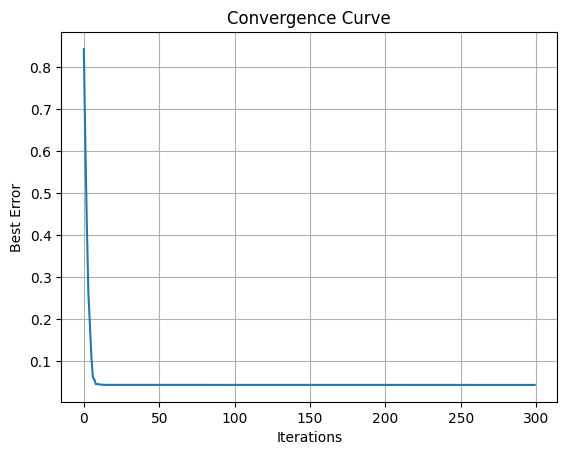

In [ ]:
#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from __future__ import division
import random
import math
import numpy as np
import matplotlib.pyplot as plt

#--- OPTIMIZATION FUNCTIONS ---------------------------------------------------+

def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

def sphere_function(x):
    return sum([xi**2 for xi in x])

def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    n = len(x)
    sum1 = sum([xi**2 for xi in x])
    sum2 = sum([np.cos(c * xi) for xi in x])
    term1 = -a * np.exp(-b * np.sqrt(sum1 / n))
    term2 = -np.exp(sum2 / n)
    return term1 + term2 + a + np.exp(1)

def rosenbrock(x):
    return sum([100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x) - 1)])

def griewank(x):
    sum_part = sum([xi**2 / 4000 for xi in x])
    prod_part = np.prod([np.cos(xi / np.sqrt(i + 1)) for i, xi in enumerate(x)])
    return sum_part - prod_part + 1

#--- MENU FUNCTION ------------------------------------------------------------+

# Menu to select the function to optimize
def select_function():
    print("Select a function to optimize:")
    print("1. Rastrigin")
    print("2. Sphere")
    print("3. Ackley")
    print("4. Rosenbrock")
    print("5. Griewank")
    choice = int(input("Enter your choice (1-5): "))

    if choice == 1:
        return rastrigin
    elif choice == 2:
        return sphere_function
    elif choice == 3:
        return ackley
    elif choice == 4:
        return rosenbrock
    elif choice == 5:
        return griewank
    else:
        print("Invalid choice. Defaulting to Rastrigin.")
        return rastrigin

#--- MAIN PSO ALGORITHM -------------------------------------------------------+

class Particle:
    def __init__(self, x0):
        self.position_i = []  # particle position
        self.velocity_i = []  # particle velocity
        self.pos_best_i = []  # best position individual
        self.err_best_i = -1  # best error individual
        self.err_i = -1  # error individual

        for i in range(0, num_dimensions):
            self.velocity_i.append(random.uniform(-1, 1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self, costFunc):
        self.err_i = costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i == -1:
            self.pos_best_i = list(self.position_i)
            self.err_best_i = self.err_i

    # update new particle velocity
    def update_velocity(self, pos_best_g):
        w = 0.5  # constant inertia weight (how much to weigh the previous velocity)
        c1 = 1.5  # cognitive constant
        c2 = 1.5  # social constant

        for i in range(0, num_dimensions):
            r1 = random.random()
            r2 = random.random()

            vel_cognitive = c1 * r1 * (self.pos_best_i[i] - self.position_i[i])
            vel_social = c2 * r2 * (pos_best_g[i] - self.position_i[i])
            self.velocity_i[i] = w * self.velocity_i[i] + vel_cognitive + vel_social

    # update the particle position based off new velocity updates
    def update_position(self, bounds):
        for i in range(0, num_dimensions):
            self.position_i[i] = self.position_i[i] + self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i] > bounds[i][1]:
                self.position_i[i] = bounds[i][1]

            # adjust minimum position if necessary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i] = bounds[i][0]


class PSO():
    def __init__(self, costFunc, x0, bounds, num_particles, maxiter):
        global num_dimensions

        num_dimensions = len(x0)
        err_best_g = -1  # best error for group
        pos_best_g = []  # best position for group
        convergence_curve = []  # To store the error values over iterations

        # establish the swarm
        swarm = []
        for i in range(0, num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i = 0
        while i < maxiter:
            # cycle through particles in swarm and evaluate fitness
            for j in range(0, num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g = list(swarm[j].position_i)
                    err_best_g = float(swarm[j].err_i)

            # cycle through swarm and update velocities and positions
            for j in range(0, num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)

            # Record the best error at each iteration for the convergence curve
            convergence_curve.append(err_best_g)
            i += 1

        # print final results
        print("FINAL:")
        # Assuming pos_best_g is a list of values
        formatted_pos_best_g = ["{:.5f}".format(value) for value in pos_best_g]
        print("Best position (formatted):", formatted_pos_best_g)
        print("Best error (formatted): {:.5f}".format(err_best_g))

        # Plotting the convergence curve
        plt.figure()
        plt.plot(convergence_curve)
        plt.title('Convergence Curve')
        plt.xlabel('Iterations')
        plt.ylabel('Best Error')
        plt.grid(True)
        plt.show()

#--- RUN PROGRAM --------------------------------------------------------------+

# Get user selection for optimization function
selected_function = select_function()

# PSO parameters
initial = [-5.12, 5.12, -5.12, 5.12, -5.12] # initial starting location [x1, x2, ...]
bounds = [(-10, 10), (-10, 10), (-10, 10), (-10, 10), (-10, 10)]  # input bounds [(x1_min, x1_max), (x2_min, x2_max), ...]

# Run the PSO algorithm
PSO(selected_function, initial, bounds, num_particles=40, maxiter=300)